# Abalone Case Study
Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Exploratory Data Analysis


In [5]:
df.shape

(4177, 9)

In [6]:
df.dtypes


Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
df.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df.columns


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [9]:
# Checking null values in the dataframe
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:

df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

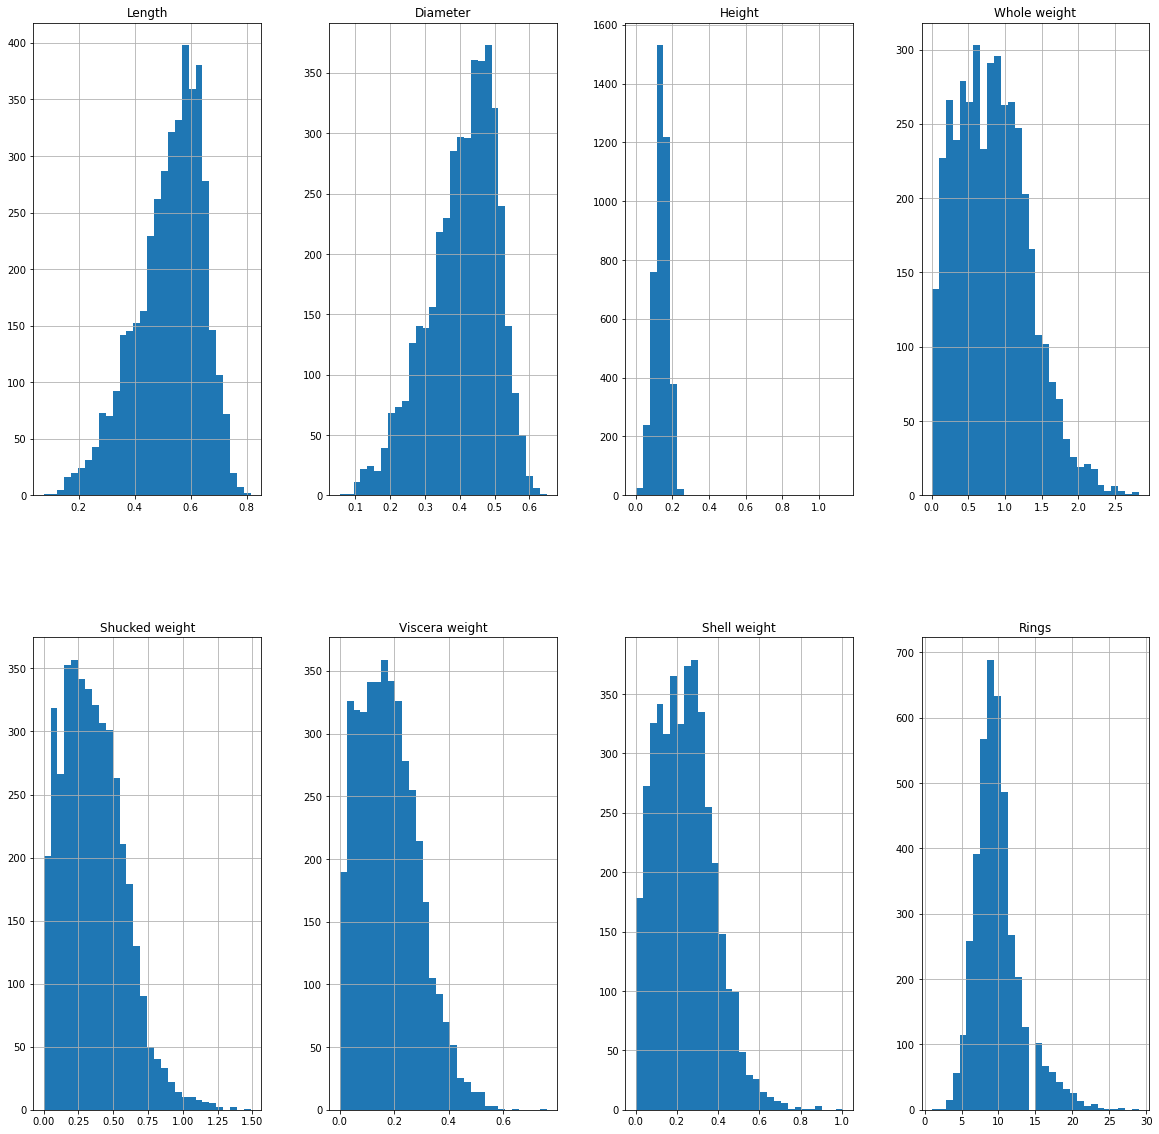

In [11]:
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)


In [12]:
df['Age'] = df['Rings']+1.5


This shows number of unique values in each column.


In [13]:
# Checking the uniqueness of dataset
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [14]:
df['Rings'].value_counts()


9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [15]:
df.skew()


Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
dtype: float64

In [16]:
# Creating correlation matrix
cor = df.corr()
cor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


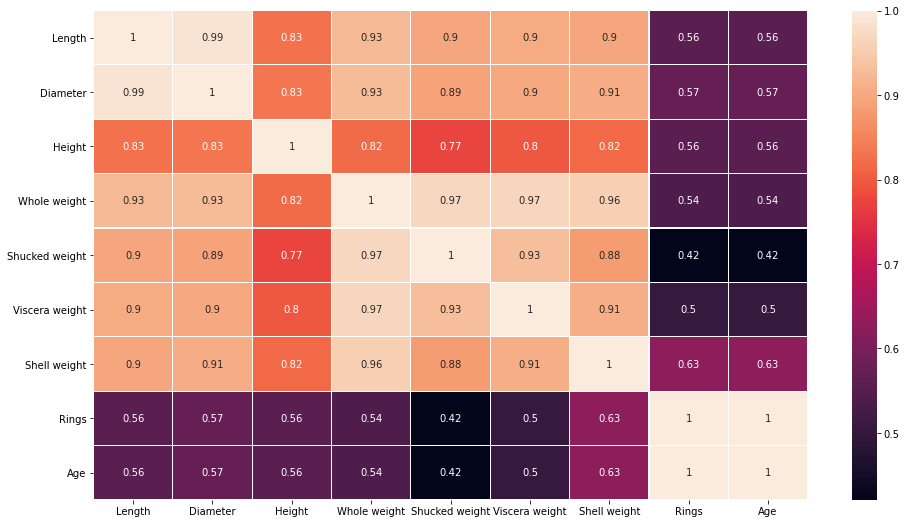

In [17]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

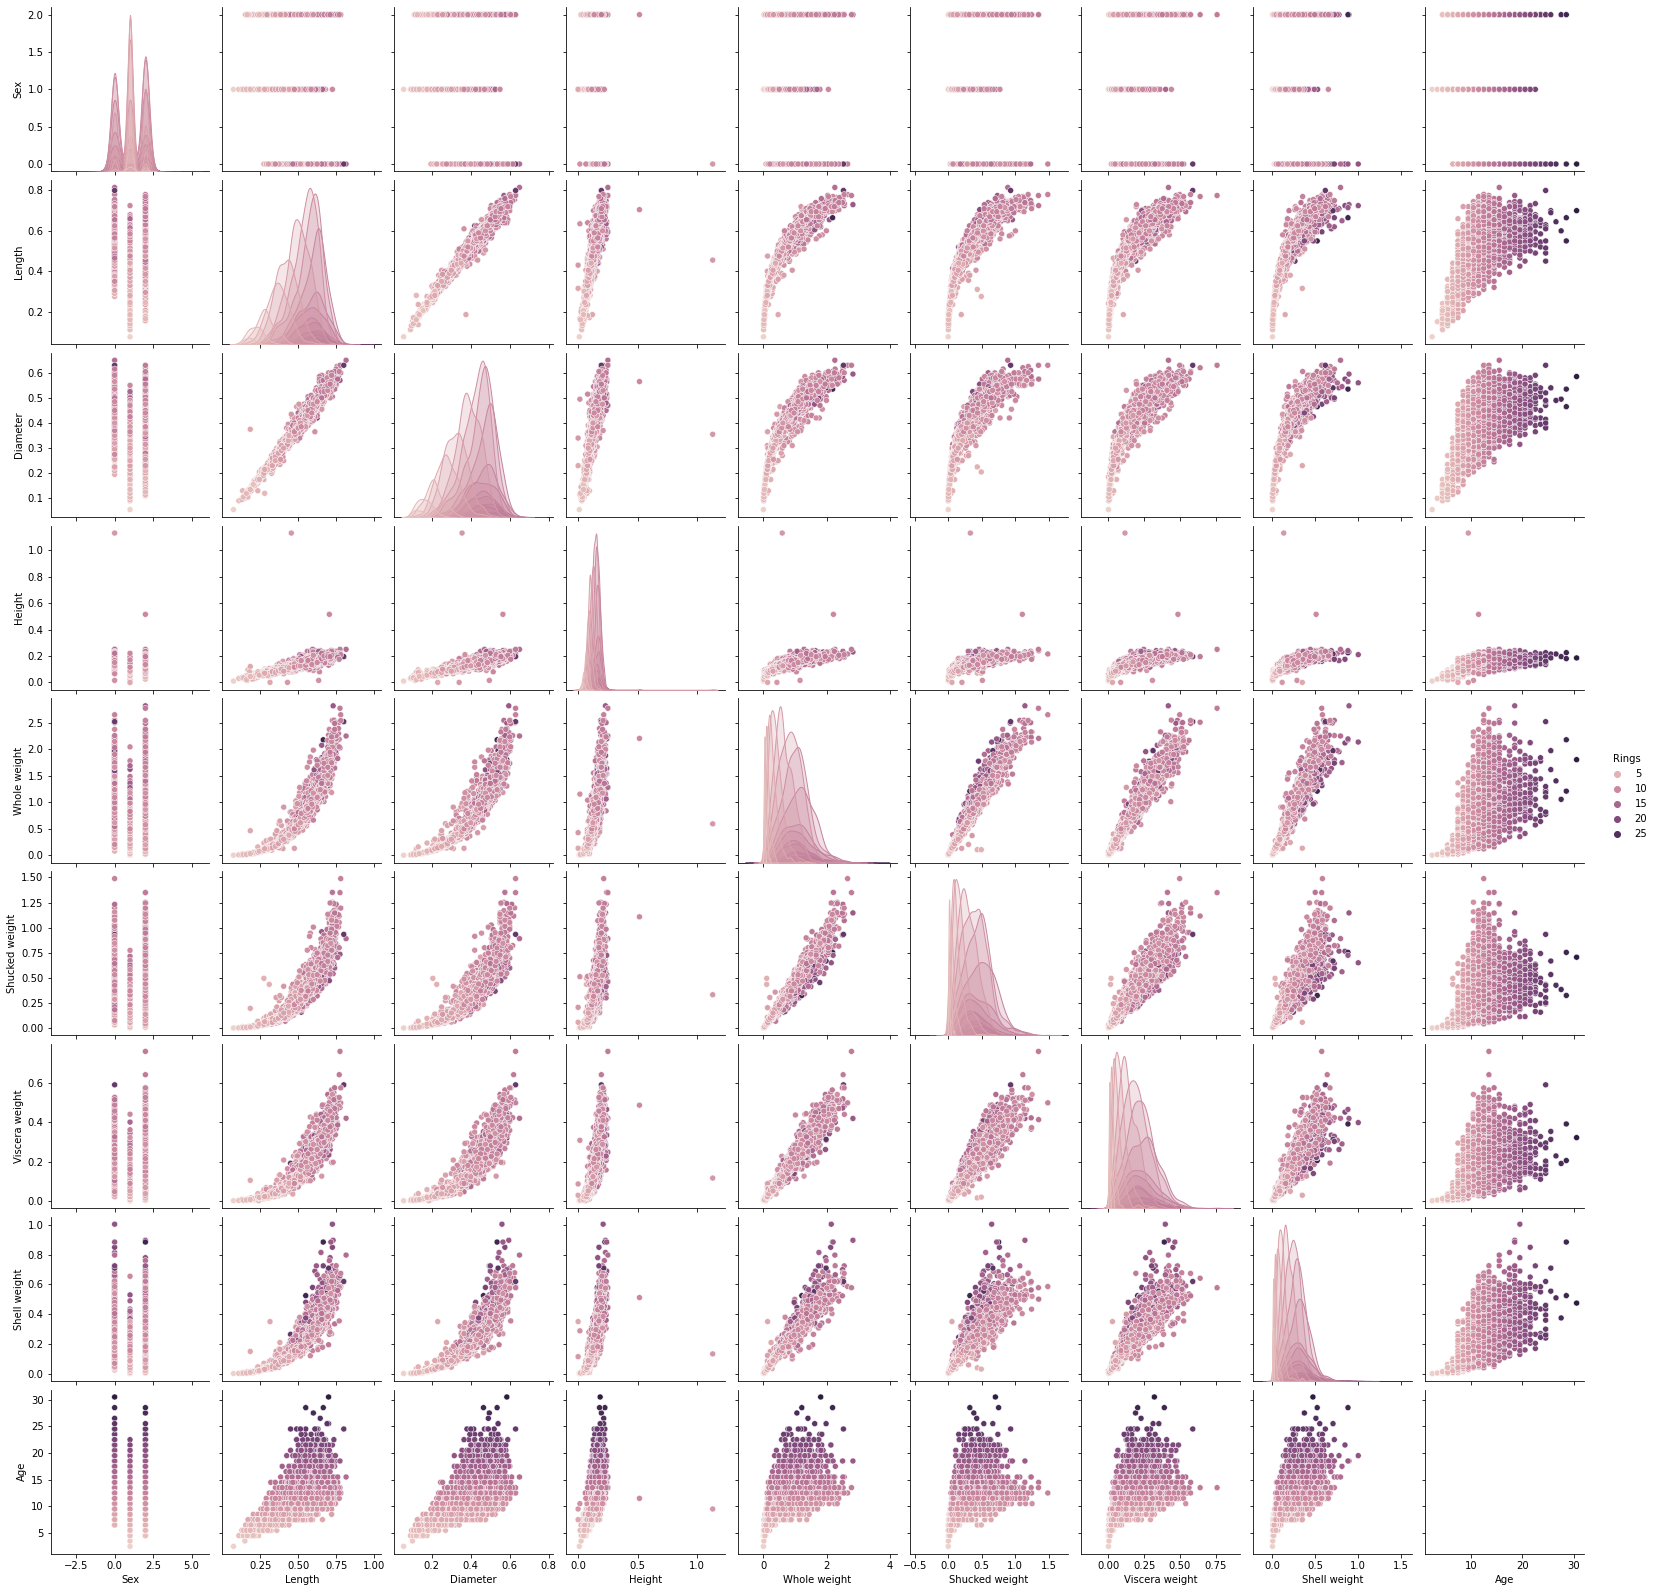

In [38]:
sns.pairplot(df,hue="Rings")


# Removing outliers


In [19]:
df1 = df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Age']]


In [20]:
# removing outliers by Zscore

from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [21]:
df.shape

(4177, 10)

In [22]:
df_new.shape

(4027, 10)

The new dataframe contains 4027 rows and 10 columns after removing the outliers.



In [23]:
# Let's check the the data loss
data_loss = (4177-4027)/4177*100
data_loss

3.5910940866650707

3.5910940866650707 % loss which is less than 5%


removing outliers by IQR method:


In [24]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [25]:
print(df_1.shape)
print(df)


(3781, 10)
      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings   Age  
0             0.1010        0.1500     15  16.5  
1             0.0485        0.0700      7   8.5  
2         

In [26]:
IQRdataloss=(((4177-3781)/4177)*100)
IQRdataloss

9.480488388795786

# Checking skewness


In [27]:
df_new.skew()


Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
Age               0.725464
dtype: float64

# Removing skewness using yeo-johnson method:


In [28]:
# Defining skewed columns 
features = ["Length","Diameter","Age"]

In [29]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [30]:
df_new[features] = scaler.fit_transform(df_new[features].values)


In [31]:
df_new[features]

,Length,Diameter,Age
0,-0.684451,-0.543379,1.672007
1,-1.411739,-1.401132,-0.981224
2,-0.046219,0.037163,-0.158989
3,-0.799651,-0.543379,0.201995
4,-1.530577,-1.474343,-0.981224
...,...,...,...
4172,0.289495,0.390420,0.536342
4173,0.545081,0.269661,0.201995
4174,0.651129,0.705921,-0.158989
4175,0.926064,0.837713,0.201995


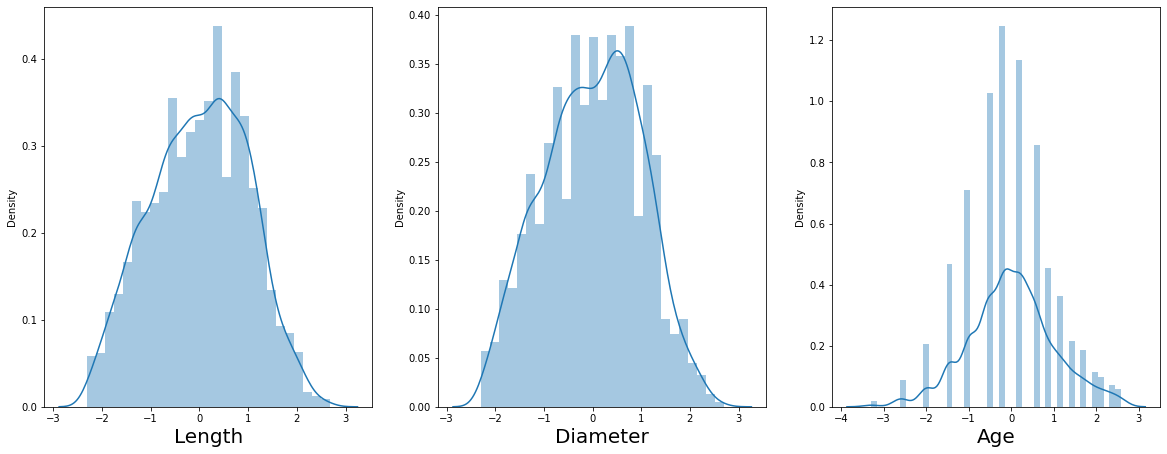

In [32]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [33]:
df_new.skew()

Sex              -0.094886
Length           -0.082985
Diameter         -0.080956
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
Age               0.000891
dtype: float64

# Model Preparation

In [34]:

x = df_new.drop("Rings",axis=1)
y = df_new["Rings"]

# Standard scaler¶


In [35]:
from sklearn.preprocessing import StandardScaler

ssc=StandardScaler()
x = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [36]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,1.159698,-0.684451,-0.543379,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659,1.672007
1,1.159698,-1.411739,-1.401132,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033,-0.981224
2,-1.285382,-0.046219,0.037163,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629,-0.158989
3,1.159698,-0.799651,-0.543379,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574,0.201995
4,-0.062842,-1.530577,-1.474343,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290,-0.981224
...,...,...,...,...,...,...,...,...,...
4022,-1.285382,0.289495,0.390420,0.732171,0.184584,0.101275,0.612382,0.143240,0.536342
4023,1.159698,0.545081,0.269661,-0.081420,0.357779,0.435609,0.375293,0.233138,0.201995
4024,1.159698,0.651129,0.705921,1.816959,0.818169,0.854737,1.081721,0.604453,-0.158989
4025,-1.285382,0.926064,0.837713,0.325376,0.639493,0.881387,0.825278,0.510647,0.201995


In [37]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

# Creating train test split


In [39]:
from sklearn.tree import DecisionTreeRegressor
maxAccuracy=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    modDTR = DecisionTreeRegressor()
    
    # Training the model
    modDTR.fit(x_train, y_train)
    
    # Predcting the value
    pred = modDTR.predict(x_test)
    
    # r2 score
    acc=r2_score(y_test, pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRS=i
print("Best accuracy is ",maxAccuracy," on Random_state ",maxRS)

Best accuracy is  1.0  on Random_state  1


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.naive_bayes import GaussianNB as NB

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)


# Random Forest Regressor¶


In [42]:
ModRFR=RandomForestRegressor()
ModRFR.fit(x_train,y_train)
pred=ModRFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 1.0


# Linear Regression:


In [49]:
modlr=LinearRegression()
modlr.fit(x_train,y_train)
pred=modlr.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9803738334019212


# K-Neighbors Regressor

In [50]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9737621458141181


# Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 1.0


# Lasso and Ridge Regression

In [62]:
#importing necessary library
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [63]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
modls=Lasso()
df_new=GridSearchCV(modls,parameters)
df_new.fit(x_train,y_train)
print(df_new.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [64]:
modls=Lasso(alpha=0.0001,random_state=0)
modls.fit(x_train,y_train)
modls.score(x_train,y_train)
pred_ls=modls.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ls))

R2_Score: 0.9803786759592215


In [66]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
modlr=Ridge()
df_new=GridSearchCV(modlr,parameters)
df_new.fit(x_train,y_train)
print(df_new.best_params_)

{'alpha': 1, 'random_state': 0}


In [57]:
modlr=Ridge(alpha=0.0001,random_state=0)
modlr.fit(x_train,y_train)
modls.score(x_train,y_train)
pred_lr=modls.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ls))

R2_Score: 0.9803738341603345


# Support Vector Machine Regressor

In [58]:
svr=SVR()
svr.fit(x_train,y_train)
pred_test=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 1.0


# Cross Validation Score


In [59]:
from sklearn.model_selection import cross_val_score


In [69]:
print("Linear Regression:",cross_val_score(modlr,x,y,cv=5).mean())
print("Random Forest Regressor:",cross_val_score(ModRFR,x,y,cv=5).mean())
print("K-Neighbors Regressor:",cross_val_score(knn,x,y,cv=5).mean())
print("Decision Tree Regressor:",cross_val_score(DTR,x,y,cv=5).mean())
print("Lasso Regression:",cross_val_score(modls,x,y,cv=5).mean())
print("Ridge Regression:",cross_val_score(modlr,x,y,cv=5).mean())
print("Support Vector Machine:",cross_val_score(svr,x,y,cv=5).mean())


Linear Regression: 0.9764675074725346
Random Forest Regressor: 0.9999999483511888
K-Neighbors Regressor: 0.9699297965791358
Decision Tree Regressor: 1.0
Lasso Regression: 0.9764522062397939
Ridge Regression: 0.9764675074725346
Support Vector Machine: 0.9952919739851348


DecisionTreeRegressor model giving 100% accuracy. So we go for DTR for Hyper parameter tuning.



# Hyper parameter tuning

In [70]:
from sklearn.model_selection import GridSearchCV
parameter = {'criterion':["mse","mae","poisson"], 'random_state':[1,10,100,1000], 'max_depth':[4,5,7,8,9], 'max_features':["auto","sqrt","log2"] }

In [71]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)


In [72]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [4, 5, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [1, 10, 100, 1000]})

In [73]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'random_state': 1}

In [74]:
Final_mod=DecisionTreeRegressor(criterion='mse',max_depth=5,max_features='auto',random_state=1)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test, pred)

print(acc*100)

100.0


# # Model Saving

DecisionTreeRegressor  is giving best results compare to others so we will create model using DTR. 

In [75]:
import pickle
filename='AbalonPredict.pkl'
pickle.dump(DTR,open(filename,'wb'))

      Actual  Predict
528       12     12.0
2872       8      8.0
2136       9      9.0
1015       9      9.0
3387      18     18.0
...      ...      ...
1728      14     14.0
330       12     12.0
3297      17     17.0
3375      10     10.0
3984      10     10.0

[1209 rows x 2 columns]


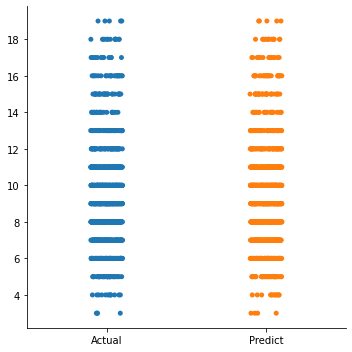

In [76]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=DTR.predict(x_test)

print(res)
sns.catplot(data=res)